# Using AgentOps to Track CAMEL Agents

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1z1-c0zYuErO7Zh2EATPyDSgrlkrxGTFR?usp=sharing)

*Goal: Track and analysis the running of CAMEL Single Agent and Multiple Agents including LLMs and Tools usage*

<img src="https://raw.githubusercontent.com/AgentOps-AI/agentops/main/docs/images/external/app_screenshots/drilldown.gif"/>

## 📦 Installation

First, install the CAMEL and AgentOps package with all its dependencies:

In [ ]:
%pip install "camel-ai[all]==0.2.1"
%pip install "agentops==0.3.10"

## 🔑 Setting Up API Keys

In [2]:
import agentops
import os
from getpass import getpass

In [3]:
# Prompt for the OpenAI API key securely
openai_api_key = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

Enter your API key: ··········


You can go to [here](https://app.agentops.ai/signin) to get **free** API Key from AgentOps

In [4]:
# Prompt for the AgentOps API key securely
agentops_api_key = getpass('Enter your API key: ')
os.environ["AGENTOPS_API_KEY"] = agentops_api_key

Enter your API key: ··········


## 🤖 Run CAMEL Single Agent with Tool by using AgentOps to track the whole process!

Import required modules from CAMEL

In [5]:
from camel.agents import ChatAgent
from camel.configs import ChatGPTConfig
from camel.messages import BaseMessage
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

Initilize AgentOps, you need to import toolkits after init of agentops so that the tool useage would be tracked.

In [6]:
AGENTOPS_API_KEY = os.getenv("AGENTOPS_API_KEY")
agentops.init(AGENTOPS_API_KEY, default_tags=["CAMEL X AgentOps Single Agent with Tool Example"])

from camel.toolkits import SearchToolkit

🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=ee5858cd-51ea-46b4-90da-df905998f374


Set one Agent with Search Tools

In [8]:
# Define system message
sys_msg = BaseMessage.make_assistant_message(
    role_name='Tools calling opertor', content='You are a helpful assistant'
)

# Set model config
tools = [*SearchToolkit().get_tools()]


model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O_MINI,
    model_config_dict=ChatGPTConfig(
        temperature=0.0,
    ).as_dict(),
)

# Set agent
camel_agent = ChatAgent(
    system_message=sys_msg,
    model=model,
    tools=tools,
)

Set user query and run the agent

In [9]:
# Define a user message
usr_msg = BaseMessage.make_user_message(
    role_name='CAMEL User', content='What is CAMEL-AI.org?'
)

# Get response information
response = camel_agent.step(usr_msg)
print(response)


agentops.end_session("Success")

msgs=[BaseMessage(role_name='Tools calling opertor', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={}, content='CAMEL-AI.org is an open-source community and framework focused on the study and development of multi-agent systems using large language models (LLMs). Here are some key points about CAMEL-AI:\n\n1. **Framework for Multi-Agent Systems**: It is the first LLM multi-agent framework, allowing for the customization and integration of various AI models to create intelligent agents.\n\n2. **Research and Insights**: The community is dedicated to exploring the behaviors, capabilities, and potential risks associated with autonomous and communicative agents. They believe that studying these agents on a large scale can provide valuable insights.\n\n3. **Customization and Modularity**: CAMEL empowers users to customize agents using modular components tailored for specific tasks, facilitating flexible integration of different AI models.\n\n4. **Open Source**: The project is open-so

🖇 AgentOps: This run's cost $0.000411
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=ee5858cd-51ea-46b4-90da-df905998f374


### 🎉  Go to the AgentOps link shown above, you will be able to see the detailed record for this running like below.

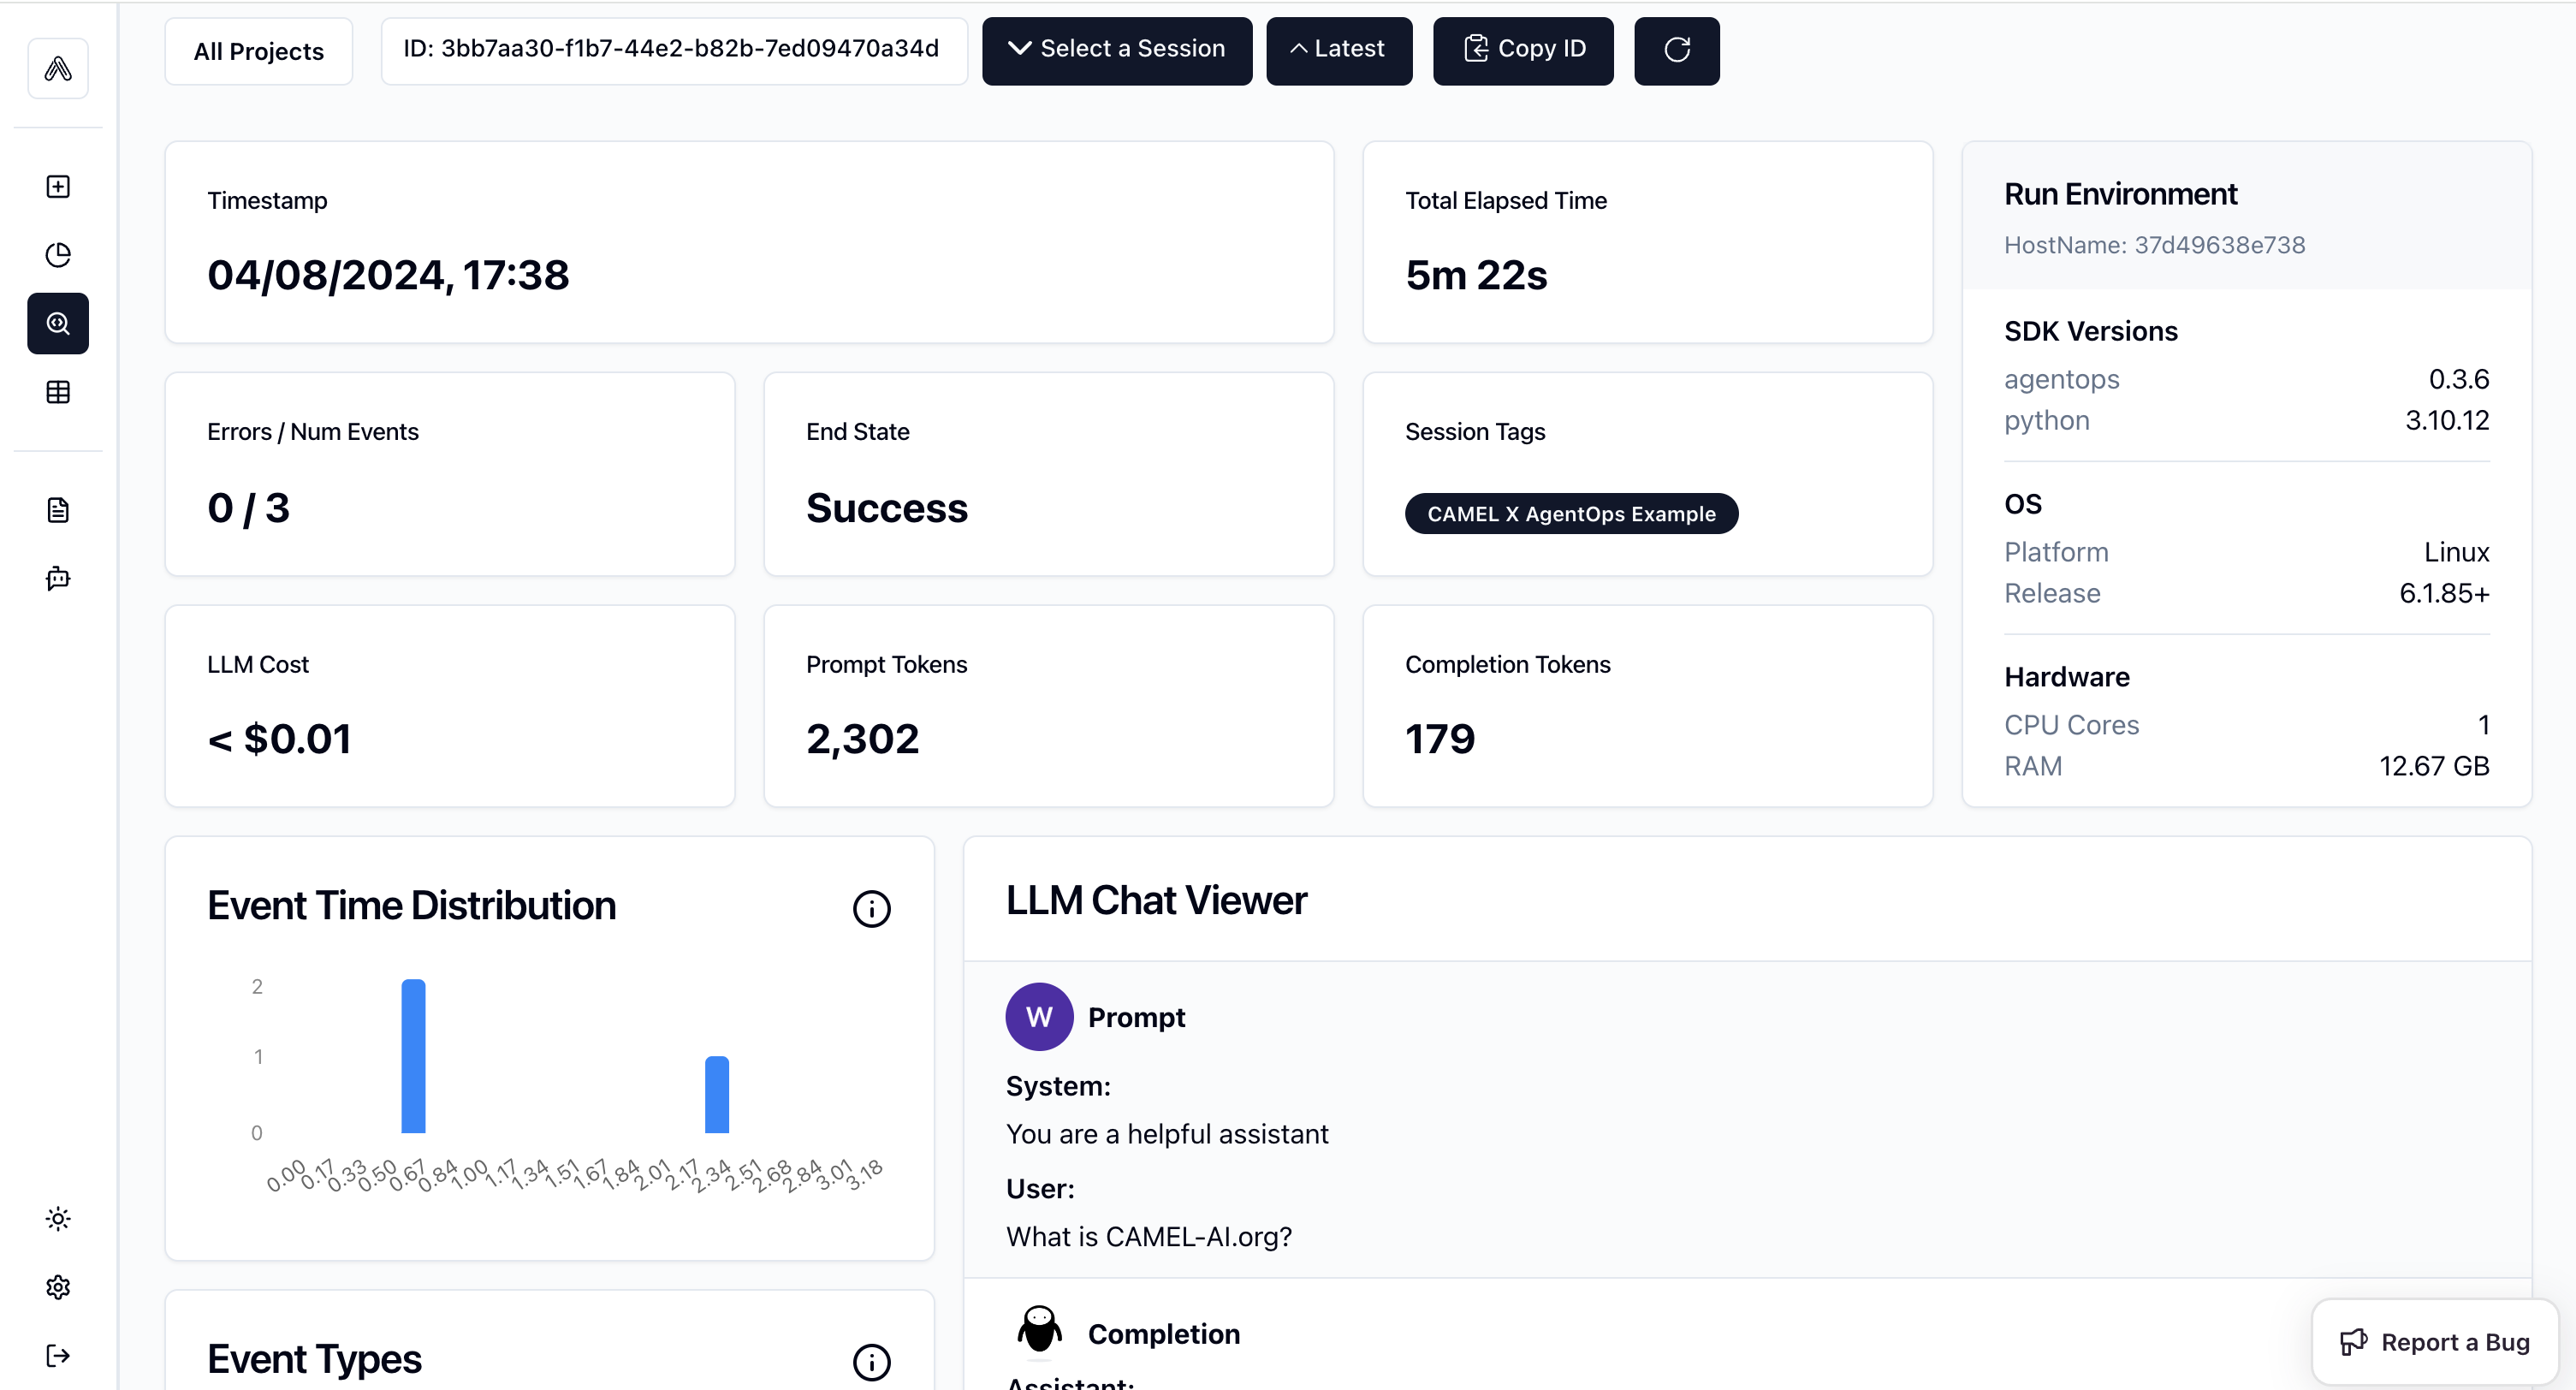

## 🤖🤖 Run CAMEL Multi-agent with Tool by using AgentOps to track the whole process!

Import required modules

In [10]:
from typing import List

from colorama import Fore

from camel.agents.chat_agent import FunctionCallingRecord
from camel.configs import ChatGPTConfig
from camel.models import ModelFactory
from camel.societies import RolePlaying
from camel.types import ModelPlatformType, ModelType
from camel.utils import print_text_animated

import agentops

Initilize AgentOps, you need to import toolkits after init of agentops so that the tool useage would be tracked.

In [11]:
agentops.start_session(tags=["CAMEL X AgentOps Multi-agent with Tools"])

from camel.toolkits import (
    SearchToolkit,
    MathToolkit,
)

🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=d67ffe18-96a6-4888-a252-e014b5f4e486


Set your task prompt

In [12]:
task_prompt = (
    "Assume now is 2024 in the Gregorian calendar, "
    "estimate the current age of University of Oxford "
    "and then add 10 more years to this age, "
    "and get the current weather of the city where "
    "the University is located."
)

Set tools for the assistant agent, we wish the agent would be able to do mathmatic calculation and search information from websites

In [13]:
tools = [
    *MathToolkit().get_tools(),
    *SearchToolkit().get_tools(),
]

Set config of the model for User Agent and Assisant Agent

In [14]:
user_model_config = ChatGPTConfig(
    temperature=0.0,
)

assistant_model_config = ChatGPTConfig(
    tools=tools,
    temperature=0.0,
)

Set up Role Playing session

In [16]:
role_play_session = RolePlaying(
    assistant_role_name="Searcher",
    user_role_name="Professor",
    assistant_agent_kwargs=dict(
        model=ModelFactory.create(
            model_platform=ModelPlatformType.OPENAI,
            model_type=ModelType.GPT_4O_MINI,
            model_config_dict=assistant_model_config.as_dict(),
        ),
        tools=tools,
    ),
    user_agent_kwargs=dict(
        model=ModelFactory.create(
            model_platform=ModelPlatformType.OPENAI,
            model_type=ModelType.GPT_4O_MINI,
            model_config_dict=user_model_config.as_dict(),
        ),
    ),
    task_prompt=task_prompt,
    with_task_specify=False,
)

Print the system message and task prompt

In [17]:
print(
    Fore.GREEN
    + f"AI Assistant sys message:\n{role_play_session.assistant_sys_msg}\n"
)
print(Fore.BLUE + f"AI User sys message:\n{role_play_session.user_sys_msg}\n")

print(Fore.YELLOW + f"Original task prompt:\n{task_prompt}\n")
print(
    Fore.CYAN
    + "Specified task prompt:"
    + f"\n{role_play_session.specified_task_prompt}\n"
)
print(Fore.RED + f"Final task prompt:\n{role_play_session.task_prompt}\n")

AI Assistant sys message:
BaseMessage(role_name='Searcher', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={'task': 'Assume now is 2024 in the Gregorian calendar, estimate the current age of University of Oxford and then add 10 more years to this age, and get the current weather of the city where the University is located.', 'assistant_role': 'Searcher', 'user_role': 'Professor'}, content='===== RULES OF ASSISTANT =====\nNever forget you are a Searcher and I am a Professor. Never flip roles! Never instruct me!\nWe share a common interest in collaborating to successfully complete a task.\nYou must help me to complete the task.\nHere is the task: Assume now is 2024 in the Gregorian calendar, estimate the current age of University of Oxford and then add 10 more years to this age, and get the current weather of the city where the University is located.. Never forget our task!\nI must instruct you based on your expertise and my needs to complete the task.\n\nI must give you one inst

Set terminate rule and print the chat message

In [18]:
n = 0
input_msg = role_play_session.init_chat()
while n < 50:
    n += 1
    assistant_response, user_response = role_play_session.step(input_msg)

    if assistant_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI Assistant terminated. Reason: "
                f"{assistant_response.info['termination_reasons']}."
            )
        )
        break
    if user_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI User terminated. "
                f"Reason: {user_response.info['termination_reasons']}."
            )
        )
        break

    # Print output from the user
    print_text_animated(
        Fore.BLUE + f"AI User:\n\n{user_response.msg.content}\n"
    )

    # Print output from the assistant, including any function
    # execution information
    print_text_animated(Fore.GREEN + "AI Assistant:")
    tool_calls: List[FunctionCallingRecord] = assistant_response.info[
        'tool_calls'
    ]
    for func_record in tool_calls:
        print_text_animated(f"{func_record}")
    print_text_animated(f"{assistant_response.msg.content}\n")

    if "CAMEL_TASK_DONE" in user_response.msg.content:
        break

    input_msg = assistant_response.msg

AI User:

Instruction: Estimate the founding year of the University of Oxford.  
Input: None


AI Assistant:

Solution: The University of Oxford is believed to have been founded in the 12th century, with the earliest evidence of teaching at the university dating back to around 1096. However, the exact founding year is not definitively known. For estimation purposes, we can consider the year 1096 as a starting point for the university's establishment.

Next request.


AI User:

Instruction: Calculate the current age of the University of Oxford in 2024 based on the estimated founding year of 1096.  
Input: None


AI Assistant:

Function Execution: sub
	Args: {'a': 2024, 'b': 1096}
	Result: 928

Solution: To calculate the current age of the University of Oxford in 2024, we subtract the estimated founding year (1096) from the current year (2024):

2024 - 1096 = 928

Therefore, the estimated current age of the University of Oxford in 2024 is 928 years.

Next request.


AI User:

Instruction

End the AgentOps session

In [19]:
agentops.end_session("Success")

🖇 AgentOps: This run's cost $0.003855
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=d67ffe18-96a6-4888-a252-e014b5f4e486


### 🎉  Go to the AgentOps link shown above, you will be able to see the detailed record for the multi-agent running like below.

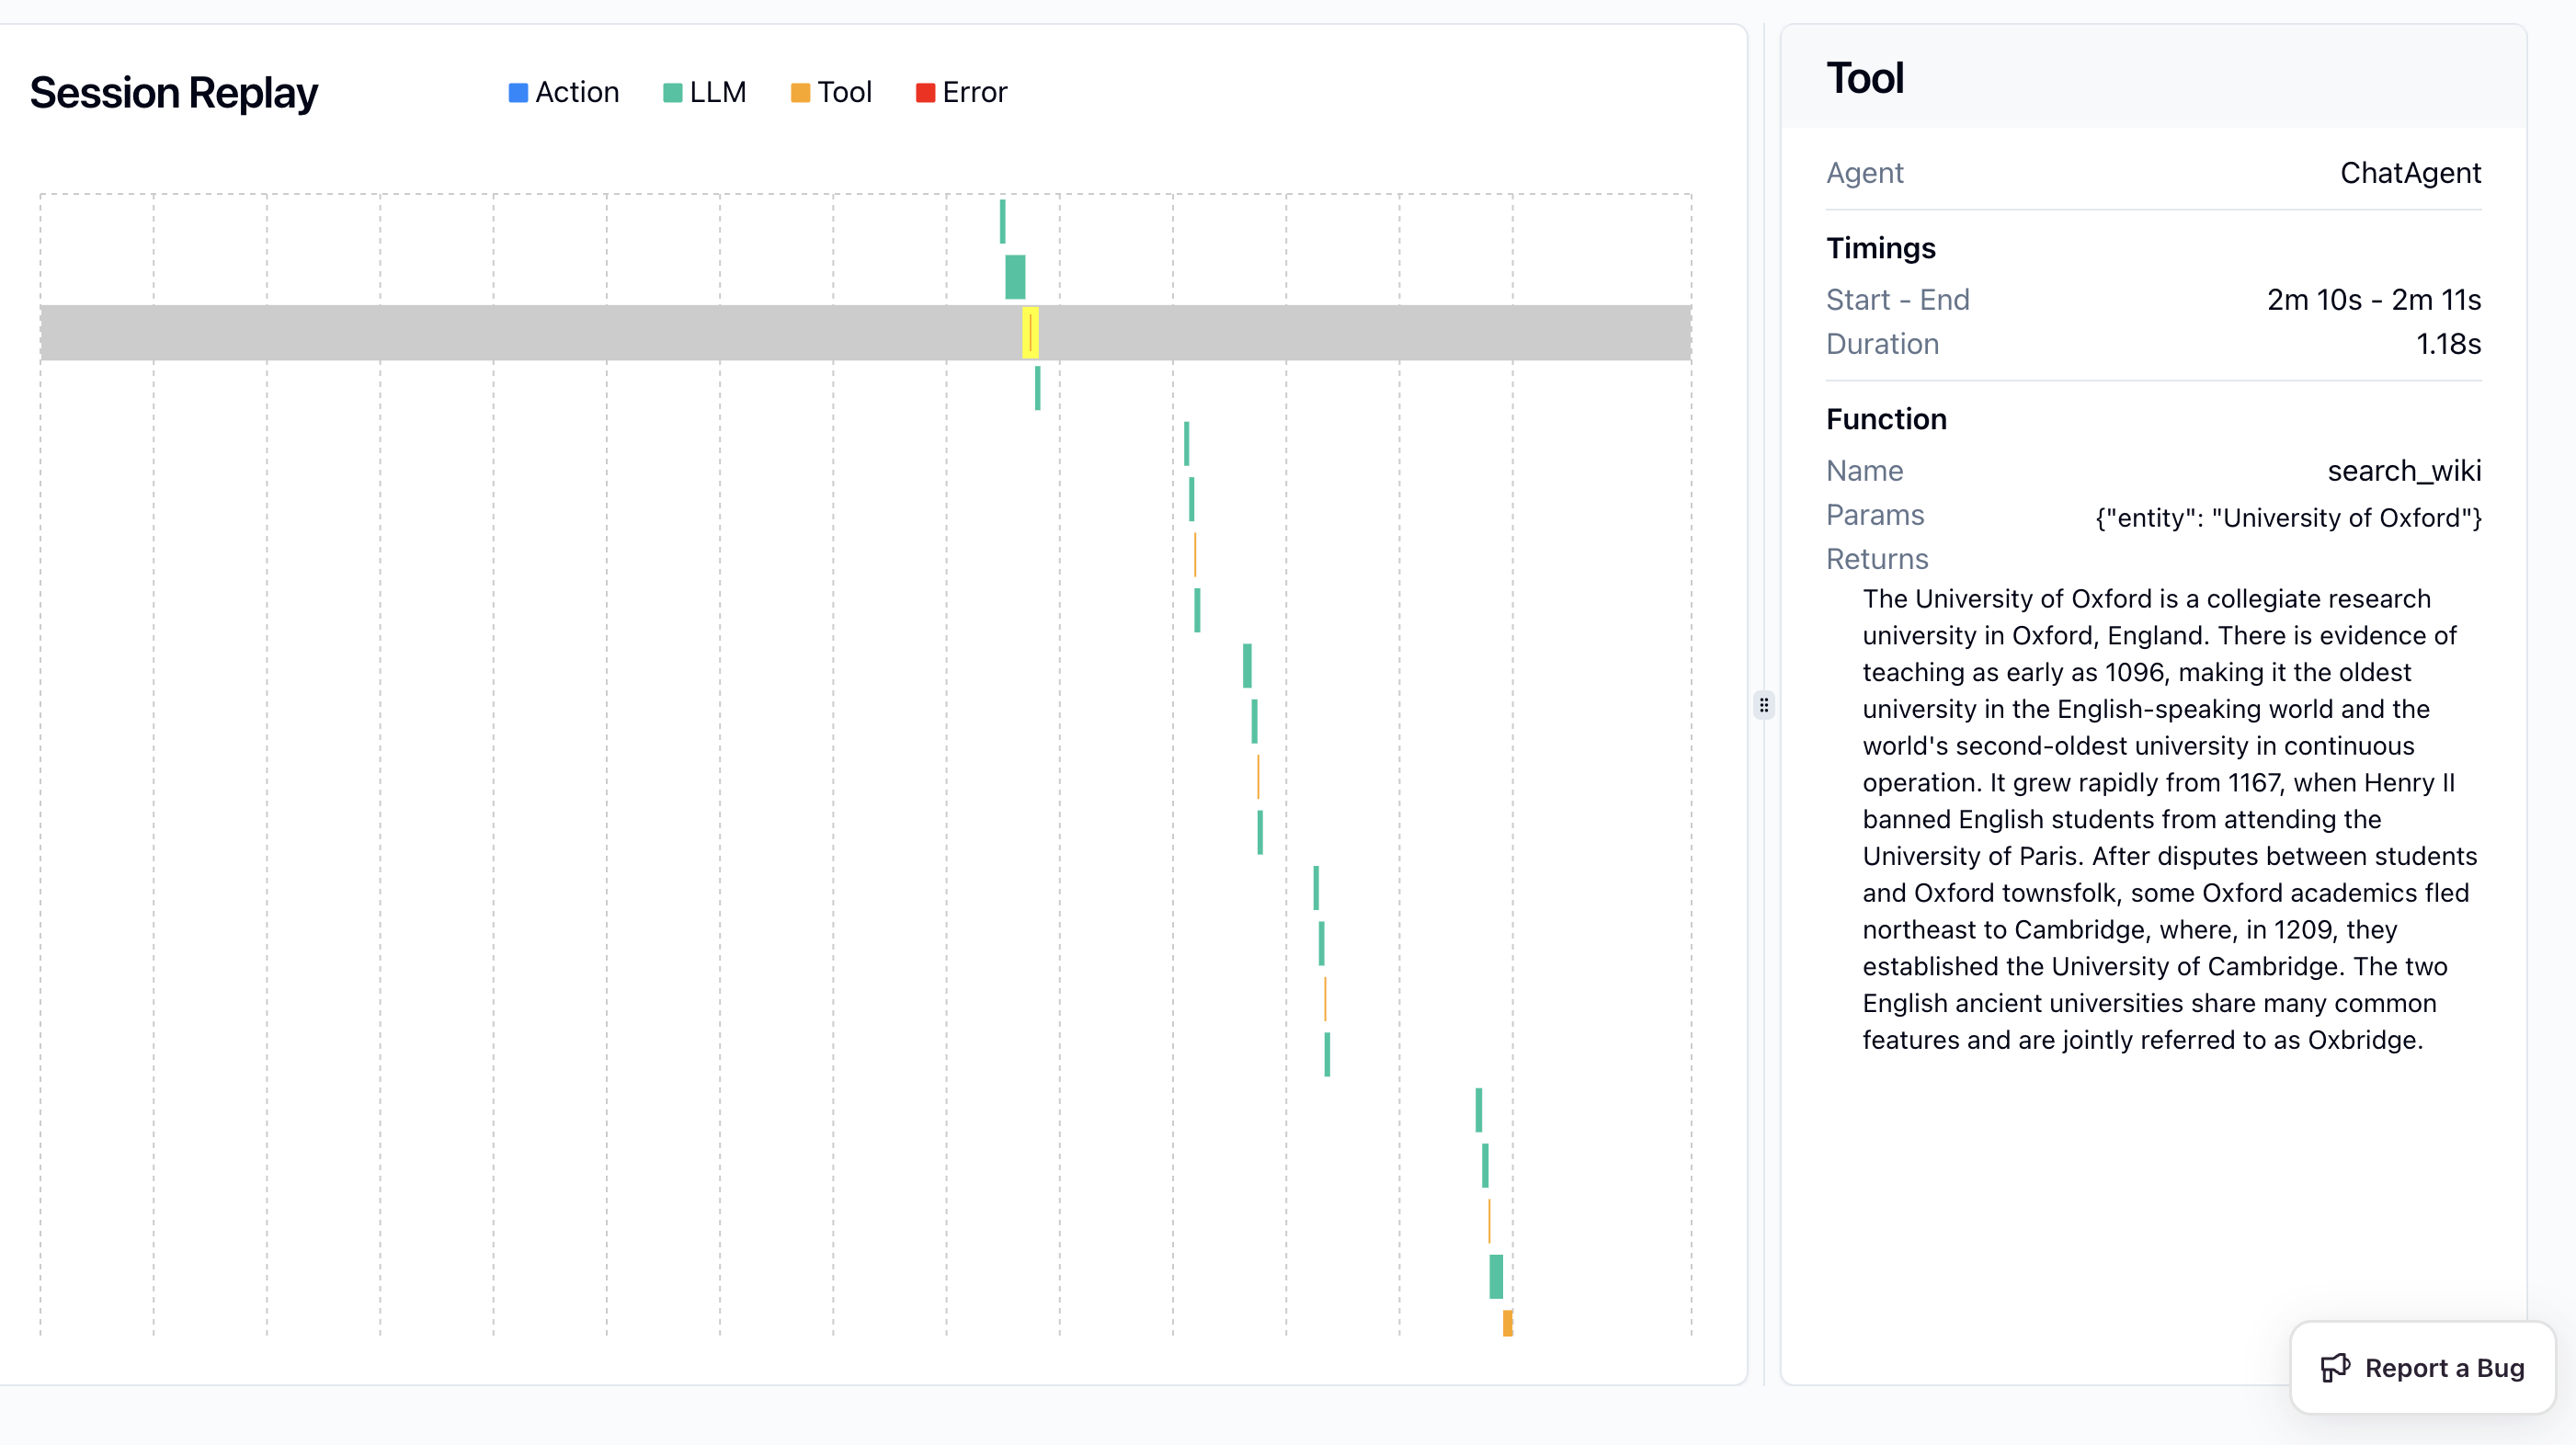